In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [4]:
# read in file
filename = ""
sheet_name = "entity"

df = pd.read_excel(filename, sheet_name)
df = df.fillna(0)

In [5]:
# sum up all male and female cases
df['total_male_abs'] = df.filter(like='_male').sum(axis=1)
df['total_female_abs'] = df.filter(like='_female').sum(axis=1)

df_sums = df[['entity', 'total_male_abs', 'total_female_abs']]

In [9]:
# Compute totals and relative numbers for each entity
df_sums.loc[:, 'total'] = df_sums.loc[:, 'total_male_abs'].copy() + df_sums.loc[:, 'total_female_abs'].copy()
df_sums.loc[:, 'total_male_rel'] = df_sums.loc[:, 'total_male_abs'].copy() / df_sums.loc[:, 'total'].copy()
df_sums.loc[:, 'total_female_rel'] = df_sums.loc[:, 'total_female_abs'].copy() / df_sums.loc[:, 'total'].copy()

### Butterfly bar chart

In [7]:
def plot_butterfly(df, relative=True):
    # Plot
    plt.figure(figsize=(10, 8))

    if relative == True:
        # Set the x-axis limits and ticks
        plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
                   ['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'])

        df = df.sort_values(by='total_female_rel', ascending=False)

        # Heights of bars
        bars1 = df['total_female_rel']
        bars2 = df['total_male_rel']

    else:
        # Sort by total
        df = df.sort_values(by='total_female_abs', ascending=False)

        # Heights of bars
        bars1 = df['total_female_abs']
        bars2 = df['total_male_abs']

    # Positions of bars
    barWidth = 0.4
    r = np.arange(len(df))

    # Create bars for female patients (to the left)
    plt.barh(r, bars1, color='#66c159', edgecolor='white', height=barWidth, label='Female')
    # Create bars for male patients (to the right)
    plt.barh(r, -bars2, color='#7187da', edgecolor='white', height=barWidth, label='Male')

    plt.yticks(r, df['entity'])

    plt.legend()
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

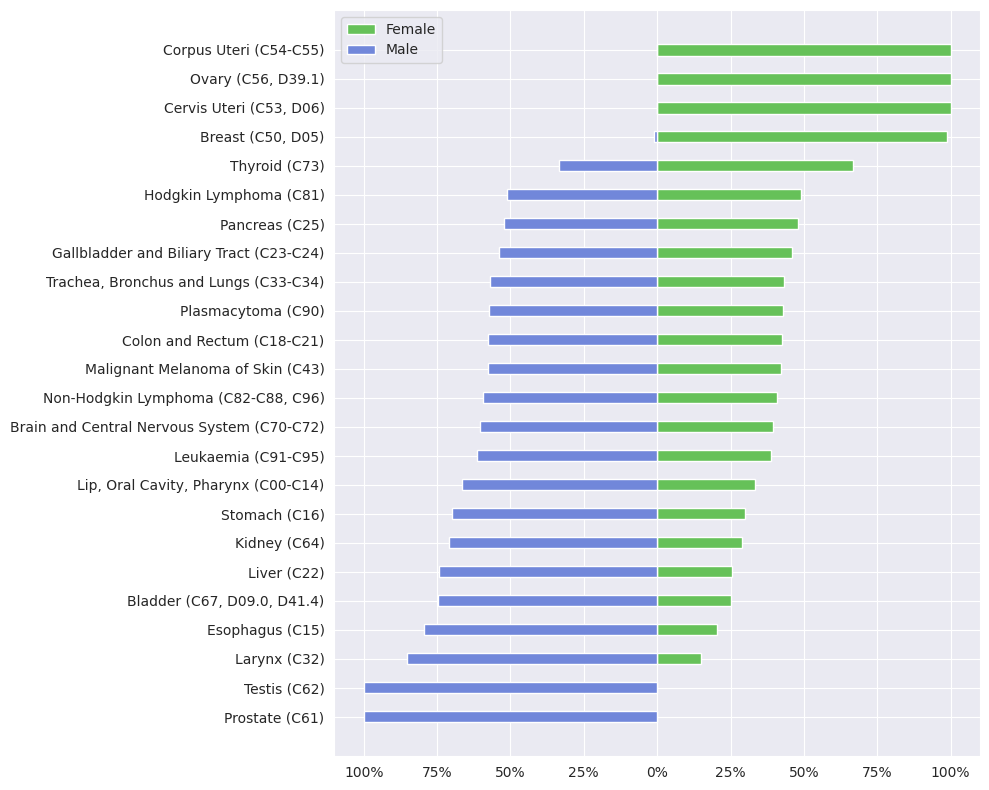

In [8]:
plot_butterfly(df_sums, relative=True)